In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Machine_Learning_SWE_427/AI_Lab_Final_Assignment/bank-data.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [43]:
dataset_dir = '/tmp/bank-data/bank-full.csv'

df = pd.read_csv(dataset_dir, delimiter=';')
extra = ['contact', 'day', 'month'] #eigular dorkar nai
df = df.drop(columns=extra)
Y = df['y']
X = df.drop('y', axis=1)


In [19]:
X

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,unknown


In [38]:
print(Y.tolist().count('no'),Y.tolist().count('yes'))

39922 5289


In [20]:
X = X.replace(['single', 'married', 'divorced'],[0,1,2])
X = X.replace(['unknown', 'success', 'other', 'failure'],[0,1,2,3])
X = X.replace(['primary', 'secondary', 'tertiary'],[1,2,3])
X = X.replace(['admin.', 'retired', 'self-employed', 'entrepreneur', 'housemaid',
               'student', 'services', 'unemployed', 'management', 'technician', 'blue-collar'],
              [1,2,3,4,5,6,7,8,9,10,11])
X = X.replace(['no','yes'],[0,1])
X

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,9,1,3,0,2143,1,0,261,1,-1,0,0
1,44,10,0,2,0,29,1,0,151,1,-1,0,0
2,33,4,1,2,0,2,1,1,76,1,-1,0,0
3,47,11,1,0,0,1506,1,0,92,1,-1,0,0
4,33,0,0,0,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,1,3,0,825,0,0,977,3,-1,0,0
45207,71,2,2,1,0,1729,0,0,456,2,-1,0,0
45208,72,2,1,2,0,5715,0,0,1127,5,184,3,1
45209,57,11,1,2,0,668,0,0,508,4,-1,0,0


In [22]:
scaled_data_mode = StandardScaler()
X = scaled_data_mode.fit_transform(X)
X

array([[ 1.60696496,  0.42416614,  0.27576178, ..., -0.41145311,
        -0.25194037, -0.44489814],
       [ 0.28852927,  0.71021461, -1.3683719 , ..., -0.41145311,
        -0.25194037, -0.44489814],
       [-0.74738448, -1.0060762 ,  0.27576178, ..., -0.41145311,
        -0.25194037, -0.44489814],
       ...,
       [ 2.92540065, -1.57817314,  0.27576178, ...,  1.43618859,
         1.05047333,  0.56617504],
       [ 1.51279098,  0.99626308,  0.27576178, ..., -0.41145311,
        -0.25194037, -0.44489814],
       [-0.37068857, -1.0060762 ,  0.27576178, ...,  1.4761376 ,
         4.52357654,  1.57724822]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=50)

In [24]:
model = SVC(kernel='sigmoid', C=1, gamma=0.1)
model.fit(x_train, y_train)

SVC(C=1, gamma=0.1, kernel='sigmoid')

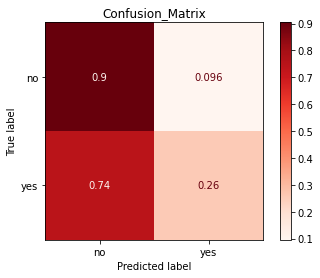

In [42]:
confusion_matrix = ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap=plt.cm.Reds, normalize='true')
plt.title('Confusion_Matrix')
plt.show(confusion_matrix)
plt.show()
     


In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.90      0.90     13211
         yes       0.26      0.26      0.26      1709

    accuracy                           0.83     14920
   macro avg       0.58      0.58      0.58     14920
weighted avg       0.83      0.83      0.83     14920



In [41]:
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the SVM model is',round(accuracy,2))

The accuracy of the SVM model is 0.83
